In [136]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# https://iwatobipen.wordpress.com/2020/01/21/make-report-with-rdkit-and-matplotlib-rdkit-memo-chemoinformatics/
# https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from matplotlib.backends.backend_pgf import PdfPages
import os
from PIL import Image
import io
import matplotlib.image as mpimg
import cairosvg
import shap

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold, KFold
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import PowerTransformer
from scipy.optimize import minimize, least_squares, brute
from scipy import optimize
from scipy.stats import boxcox
#import pickle

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [22]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.0})

from pylab import *
rc('axes', linewidth=1.0)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [42]:
df_1 = pd.read_csv('new_list_2.csv')

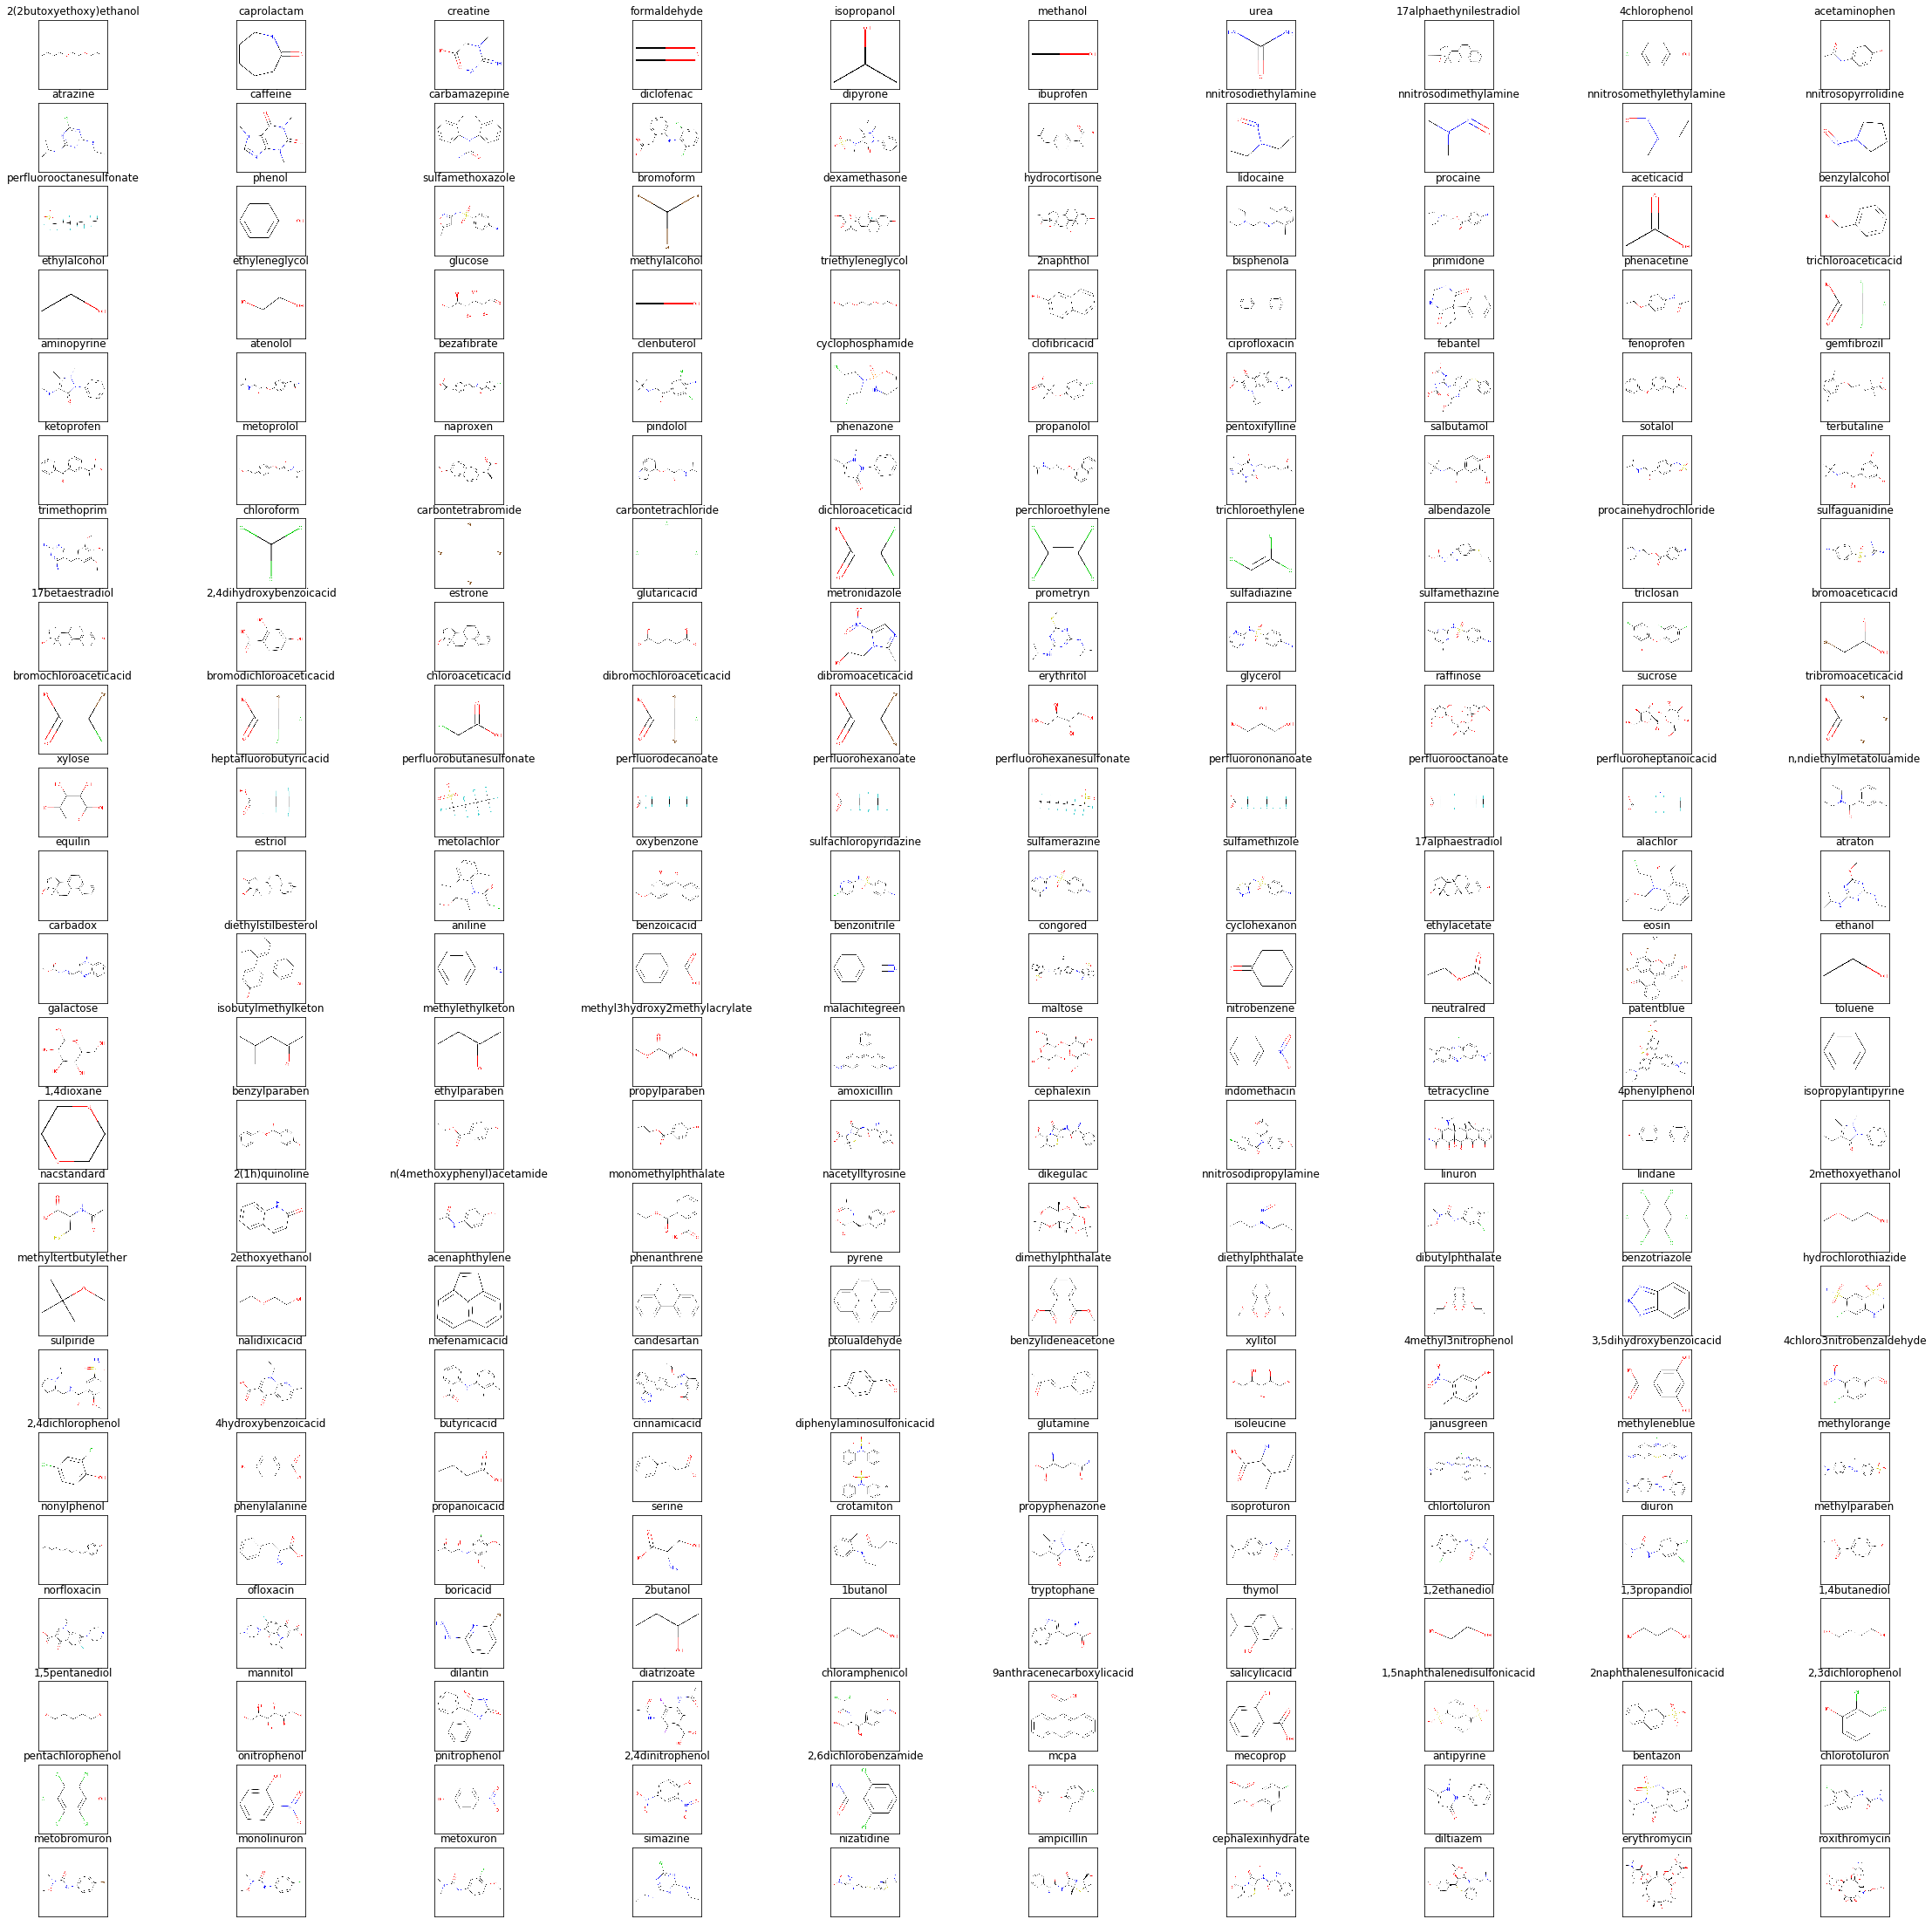

In [3]:
fig = plt.figure(figsize=(40,40))

for i in range(len(df_1)):
    m = Chem.MolFromSmiles(df_1['SMILES'].iloc[i])
    Draw.MolToFile(m,'mol.png', size=(600, 600))
#     Draw.MolToFile(m, 'mol.svg', size=(600, 600))
#     cairosvg.svg2png(url='mol.svg', write_to='mo.png')
#     img = Image.open('mol.svg')
    img = mpimg.imread('mol.png')
    #print(img)
    ax = fig.add_subplot(23,10,i+1)
    ax.imshow(img)
    ax.set_title(df_1['compound'].iloc[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
plt.show()

fig.savefig("report.pdf", bbox_inches='tight', transparent=True, dpi='figure')

In [4]:
plt.clf()
plt.interactive('off')
fig = plt.figure(figsize=(8.27, 11.69)) #A4 size
pdf_pages = PdfPages('report.pdf')

for i, m in enumerate(mols[:5]):
    ax1 = plt.subplot2grid((5,3),(i,0))
    im1 = im1.resize((400,400))
    ax1.imshow(im1, interpolation="catrom")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)  
    
pdf_pages.savefig(fig, dpi=200)
pdf_pages.close()

NameError: name 'mols' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 595.44x841.68 with 0 Axes>

# Previous dataset

In [53]:
df_ori = pd.read_csv('compound_rejections_2.csv')

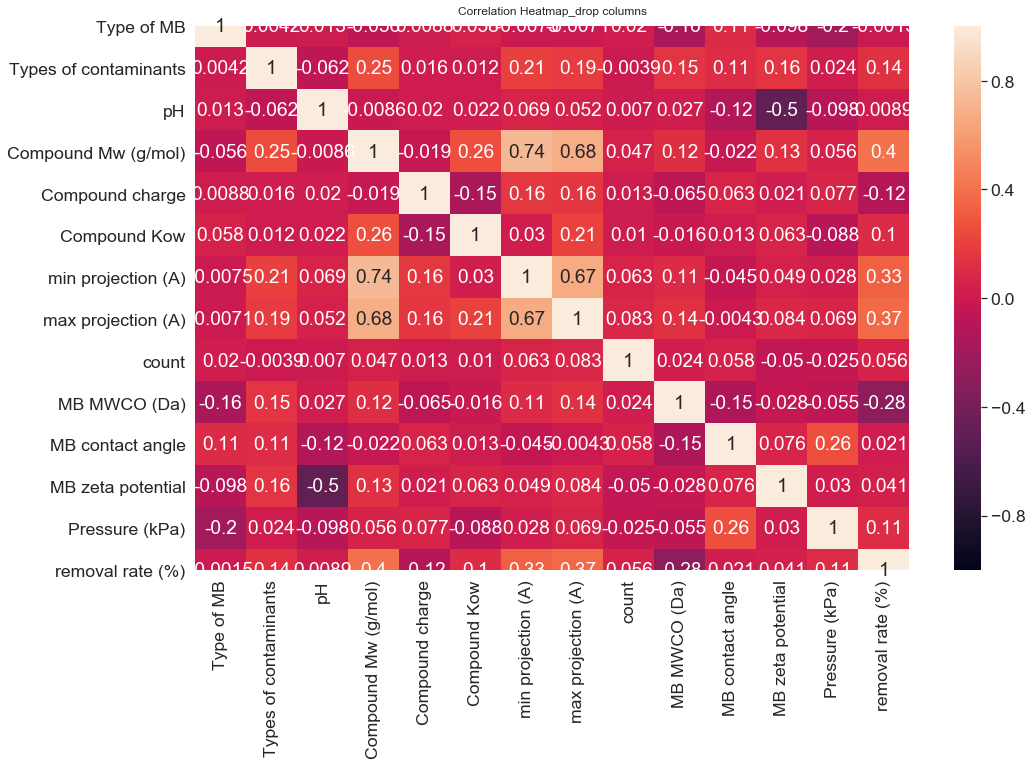

In [54]:
selected_columns = df_ori[['Type of MB', 'Types of contaminants', 'pH', 'Compound Mw (g/mol)', 'Compound charge', 'Compound Kow', 'min projection (A)', 'max projection (A)', 'count', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

In [55]:
df_ori = df_ori[df_ori['removal rate (%)'] >= 80]

In [56]:
y_data = df_ori['removal rate (%)']
x_data = df_ori.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [57]:
power = PowerTransformer(standardize=True)
y_data_trans = power.fit_transform(y_data.values.reshape(-1, 1))

In [58]:
x_data

,Type of MB,Types of contaminants,pH,Compound Mw (g/mol),Compound charge,Compound Kow,min projection (A),max projection (A),count,MB MWCO (Da),MB contact angle,MB zeta potential,Total charge,Pressure (kPa),Measurement time (min),Initial concentration of compound (mg/L),compound size (nm)
0,AK,2-(2-Butoxyethoxy)ethanol,7.0,162.229,0.0000,0.711,3.25,8.08,18.0,150,50.0,-1.0,0.0000,800.0,10.0,0.16223,0.512
1,AK,Caprolactam,7.0,113.160,0.0000,0.310,3.92,4.01,17.0,150,50.0,-1.0,0.0000,800.0,10.0,0.11316,0.396
2,AK,Creatine,7.0,131.135,0.0000,-2.864,3.35,4.36,20.0,150,50.0,-1.0,0.0000,800.0,10.0,0.13114,0.382
7,BW30,17alpha-Ethynilestradiol,7.0,296.410,0.0000,4.330,4.44,7.20,43.0,100,76.0,-1.0,0.0000,2000.0,10.0,1.48205,0.565
8,BW30,4-Chlorophenol,7.0,128.560,-0.0108,2.274,3.39,4.57,13.0,100,76.0,-1.0,0.0108,2000.0,10.0,0.64280,0.394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,ESPA1,Indomethacin,7.0,357.790,-1.0000,3.530,5.24,8.54,NaN,200,22.6,-1.0,1.0000,500.0,1440.0,0.02000,0.669
1902,ESPA1,Cephalexin hydrate,7.0,347.390,-0.3711,-2.142,4.74,6.38,NaN,200,22.6,-1.0,0.3711,500.0,1440.0,0.02000,0.550
1903,ESPA1,Diltiazem,7.0,414.520,0.9374,2.727,6.13,8.50,NaN,200,22.6,-1.0,-0.9374,500.0,1440.0,0.02000,0.722
1904,ESPA1,Erythromycin,7.0,733.937,1.0000,2.596,6.83,9.32,NaN,200,22.6,-1.0,-1.0000,500.0,1440.0,0.02000,0.798


In [43]:
le_mem_type = LabelEncoder()
x_data.iloc[:,0] = le_mem_type.fit_transform(x_data.iloc[:,0])
le_con_type = LabelEncoder()
x_data.iloc[:,1] = le_mem_type.fit_transform(x_data.iloc[:,1])

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MW = preprocessing.MinMaxScaler()
scaler_char = preprocessing.MinMaxScaler()
scaler_Kow = preprocessing.MinMaxScaler()
scaler_min = preprocessing.MinMaxScaler()
scaler_max = preprocessing.MinMaxScaler()
scaler_cnt = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_total = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_time = preprocessing.MinMaxScaler()
scaler_conc = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

scaler_mem_type.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_type.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
scaler_con_type.fit(x_data.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_1 = scaler_con_type.transform(x_data.loc[:,'Types of contaminants'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
scaler_kPa.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_6 = scaler_kPa.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
scaler_removal.fit(y_data_trans)
temp_7 = scaler_removal.transform(y_data_trans)

scaler_MW.fit(x_data.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_8 = scaler_MW.transform(x_data.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
scaler_char.fit(x_data.loc[:,'Compound charge'].values.reshape(-1,1))
temp_9 = scaler_char.transform(x_data.loc[:,'Compound charge'].values.reshape(-1,1))
scaler_Kow.fit(x_data.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_10 = scaler_Kow.transform(x_data.loc[:,'Compound Kow'].values.reshape(-1,1))
scaler_min.fit(x_data.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_11 = scaler_min.transform(x_data.loc[:,'min projection (A)'].values.reshape(-1,1))
scaler_max.fit(x_data.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max.transform(x_data.loc[:,'max projection (A)'].values.reshape(-1,1))
scaler_cnt.fit(x_data.loc[:,'count'].values.reshape(-1,1))
temp_13 = scaler_cnt.transform(x_data.loc[:,'count'].values.reshape(-1,1))
scaler_total.fit(x_data.loc[:,'Total charge'].values.reshape(-1,1))
temp_14 = scaler_total.transform(x_data.loc[:,'Total charge'].values.reshape(-1,1))
scaler_time.fit(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_15 = scaler_time.transform(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
scaler_conc.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_16 = scaler_conc.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))


x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_data_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_data_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_data_scaled = temp_7.reshape(1,-1).tolist()[0]

x_data_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_data_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_data_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_data_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_data_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_data_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_data_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_data_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_data_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [45]:
x_data_scaled

,Type of MB,Types of contaminants,pH,MB MWCO (Da),MB contact angle,MB zeta potential,Pressure (kPa),Compound Mw (g/mol),Compound charge,Compound Kow,min projection (A),max projection (A),Total charge,Measurement time (min),Initial concentration of compound (mg/L)
0,0.000000,0.069869,0.545455,0.215190,0.547692,0.0,0.171779,0.163814,0.522452,0.547136,0.166193,0.483572,0.499512,0.000000,0.000081
1,0.000000,0.257642,0.545455,0.215190,0.547692,0.0,0.171779,0.103012,0.522452,0.515842,0.261364,0.140691,0.499512,0.000000,0.000056
2,0.000000,0.331878,0.545455,0.215190,0.547692,0.0,0.171779,0.125285,0.522452,0.268144,0.180398,0.170177,0.499512,0.000000,0.000065
3,0.000000,0.475983,0.545455,0.215190,0.547692,0.0,0.171779,0.000000,0.522452,0.455205,0.000000,0.000000,0.499512,0.000000,0.000015
4,0.000000,0.537118,0.545455,0.215190,0.547692,0.0,0.171779,0.037260,0.522452,0.511550,0.123580,0.085931,0.499512,0.000000,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,0.342105,0.524017,0.545455,0.341772,0.126154,0.0,0.079755,0.406135,0.261226,0.767130,0.448864,0.522325,0.749756,0.248696,0.000010
1902,0.342105,0.283843,0.545455,0.341772,0.126154,0.0,0.079755,0.393248,0.425511,0.324489,0.377841,0.340354,0.592378,0.248696,0.000010
1903,0.342105,0.397380,0.545455,0.341772,0.126154,0.0,0.079755,0.476430,0.767326,0.704464,0.575284,0.518955,0.264933,0.248696,0.000010
1904,0.342105,0.432314,0.545455,0.341772,0.126154,0.0,0.079755,0.872222,0.783679,0.694241,0.674716,0.588037,0.249268,0.248696,0.000010


0.6944133524702487


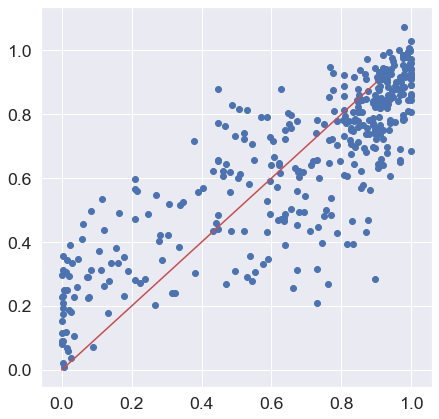

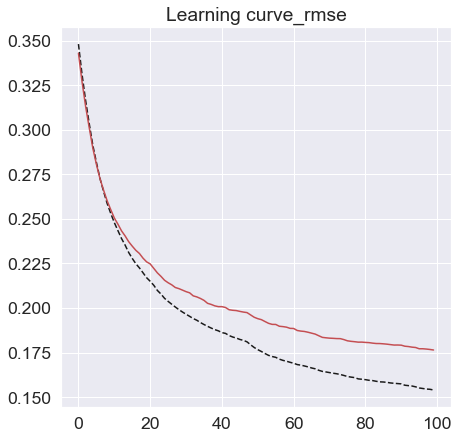

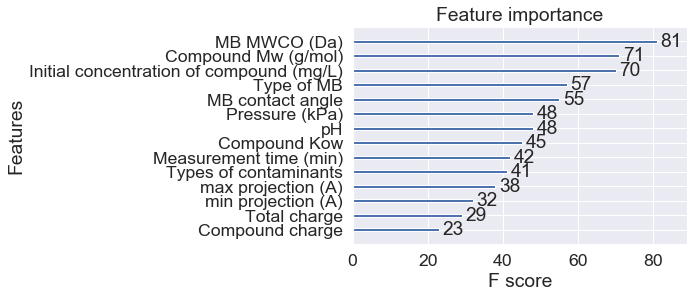

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=False)
# model_CA_1.fit(x_train, y_train)
pred_CA_1 = model_CA_1.predict(x_test)

print(r2_score(y_test, pred_CA_1))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))

plt.figure(figsize=(7,7))
plt.scatter(y_test, pred_CA_1)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

xgb.plot_importance(model_CA_1)

# Build a model

In [2]:
# Rdkit 2048 (path length 7)
#df_2 = pd.read_csv('df_fin_2048.csv')
df_2 = pd.read_csv('df_fin_path_32768_3_fin.csv')
#df_2 = pd.read_csv('df_fin_path_2048_7_short.csv')

In [75]:
# Morgan 2048 (radius 7)
df_2 = pd.read_csv('df_fin_morgan_16384_3_fin.csv')

In [138]:
# PubChem 881
df_2 = pd.read_csv('df_fin_PubChem_new.csv')

In [115]:
# MACCS 166
#df_2 = pd.read_csv('df_fin_MACCS.csv')
df_2 = pd.read_csv('df_fin_MACCS_new.csv')

In [228]:
# Avalon 2048
df_2 = pd.read_csv('df_fin_Avalon_new.csv')

In [156]:
df_2 = pd.read_csv('0514_test_4.csv')

In [3]:
df_2

,Type of MB,Types of contaminants,pH,MB MWCO (Da),MB contact angle,Pressure (kPa),Measurement time (min),Initial concentration of compound (mg/L),removal rate (%),1,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,AK,2(2butoxyethoxy)ethanol,7.0,150,50.0,800.0,10.0,0.16223,81.59,0,...,0,0,0,0,0,0,0,0,0,0
1,AK,caprolactam,7.0,150,50.0,800.0,10.0,0.11316,82.85,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,creatine,7.0,150,50.0,800.0,10.0,0.13114,96.65,0,...,0,0,0,0,0,0,0,0,0,0
3,AK,formaldehyde,7.0,150,50.0,800.0,10.0,0.03003,3.35,0,...,0,0,0,0,0,0,0,0,0,0
4,AK,isopropanol,7.0,150,50.0,800.0,10.0,0.06010,65.27,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,XLE440,trichloroethylene,8.0,150,39.8,410.0,2880.0,0.10000,3.00,0,...,0,0,0,0,0,0,0,0,0,0
1902,XLE440,chloroform,8.0,150,39.8,410.0,10.0,0.10000,10.00,0,...,0,0,0,0,0,0,0,0,0,0
1903,XLE440,carbontetrachloride,8.0,150,39.8,410.0,10.0,0.10000,69.00,0,...,0,0,0,0,0,0,0,0,0,0
1904,XLE440,perchloroethylene,8.0,150,39.8,410.0,10.0,0.10000,71.00,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#df_drop = df.drop(columns=['id', 'name', 'reportTitle', 'reportYear', 'reportAuthor', 'structureOther', 'chemistryOther', 'modificationOther', 'characterization', 'otherSolutes', 'couponSize', 'otherSolutesDetails', 'pwPs'])
selected_columns = df_2[['Type of MB', 'Types of contaminants', 'pH', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'Initial concentration of compound (mg/L)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

KeyError: "['Type of MB', 'pH', 'Pressure (kPa)', 'Initial concentration of compound (mg/L)'] not in index"

In [100]:
df_2['removal rate (%)'] = pd.cut(df_2['removal rate (%)'], bins=[-0.1, 40, 75, 85, 92, 96, 98, 100.1], labels=['1', '2', '3', '4', '5', '6', '7'])

In [101]:
df_2['removal rate (%)'].value_counts().sort_index()

1    254
2    273
3    220
4    255
5    312
6    158
7    315
Name: removal rate (%), dtype: int64

In [85]:
df_2 = df_2[df_2['removal rate (%)'] <= 80]

In [4]:
df_2.drop(labels=['Types of contaminants'], axis=1, inplace=True)
#df_2.drop(labels=['PCA_size'], axis=1, inplace=True)

In [5]:
y_data = df_2['removal rate (%)']
x_data = df_2.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [6]:
#y_data_trans = y_data.values.reshape(-1, 1)

(array([ 61.,  70.,  57.,  66.,  47.,  68.,  71., 175., 301., 990.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

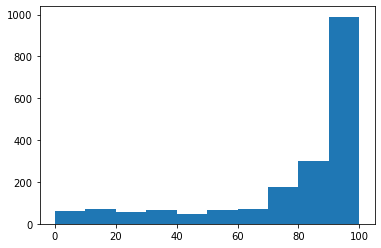

In [7]:
plt.hist(y_data)

In [222]:
np.amin(y_data)

0.0

In [14]:
y_data_trans = y_data/100
#y_data_trans = y_data

In [15]:
# for i in range(len(y_data_trans)):
#     if y_data_trans[i] == 0.0:
#         y_data_trans[i] = 0.01
#     if y_data_trans[i] >= 99.99:
#         y_data_trans[i] = 99.99
        
for i in range(len(y_data_trans)):
    if y_data_trans[i] == 0.000:
        y_data_trans[i] = 0.0001
    if y_data_trans[i] >= 0.9999:
        y_data_trans[i] = 0.9999

In [16]:
np.amax(y_data_trans)

0.9999

In [17]:
#y_data_trans = np.log10(100-y_data_trans)
y_data_trans = np.log10(1-y_data_trans)

In [18]:
y_data_trans

0      -0.734946
1      -0.765736
2      -1.474955
3      -0.014798
4      -0.459295
          ...   
1901   -0.013228
1902   -0.045757
1903   -0.508638
1904   -0.537602
1905   -0.769551
Name: removal rate (%), Length: 1906, dtype: float64

(array([ 75.,   3.,   7.,  40., 130., 143., 382., 386., 370., 370.]),
 array([-4.00000000e+00, -3.60000434e+00, -3.20000869e+00, -2.80001303e+00,
        -2.40001737e+00, -2.00002172e+00, -1.60002606e+00, -1.20003040e+00,
        -8.00034745e-01, -4.00039088e-01, -4.34316198e-05]),
 <BarContainer object of 10 artists>)

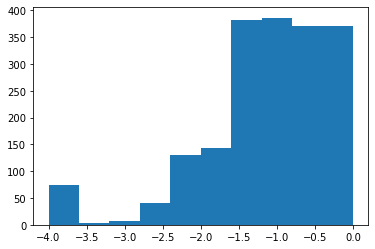

In [19]:
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(b.values.reshape(-1,1))
#temp = scaler.transform(b.values.reshape(-1,1))
plt.hist(y_data_trans)

In [124]:
y_data_trans.agg(['skew', 'kurtosis']).transpose()

skew       -1.355207
kurtosis    2.333698
Name: removal rate (%), dtype: float64

In [8]:
#y_data_trans = y_data_trans.values.reshape(-1, 1)
y_data_trans = y_data.values.reshape(-1, 1)

In [9]:
x_data

,Type of MB,pH,MB MWCO (Da),MB contact angle,Pressure (kPa),Measurement time (min),Initial concentration of compound (mg/L),1,2,3,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,AK,7.0,150,50.0,800.0,10.0,0.16223,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AK,7.0,150,50.0,800.0,10.0,0.11316,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,7.0,150,50.0,800.0,10.0,0.13114,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AK,7.0,150,50.0,800.0,10.0,0.03003,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AK,7.0,150,50.0,800.0,10.0,0.06010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,XLE440,8.0,150,39.8,410.0,2880.0,0.10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,XLE440,8.0,150,39.8,410.0,10.0,0.10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1903,XLE440,8.0,150,39.8,410.0,10.0,0.10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,XLE440,8.0,150,39.8,410.0,10.0,0.10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
le_mem_name = LabelEncoder()
x_data.loc[:,'Type of MB'] = le_mem_name.fit_transform(x_data.loc[:,'Type of MB'])
le_mem_type = LabelEncoder()
x_data.loc[:,'mem_material'] = le_mem_type.fit_transform(x_data.loc[:,'mem_material'])
# le_con_type = LabelEncoder()
# x_data.iloc[:,1] = le_mem_type.fit_transform(x_data.iloc[:,1])

scaler_mem_name = preprocessing.MinMaxScaler()
scaler_PCA_size = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
#scaler_zeta = preprocessing.MinMaxScaler()
#scaler_kPa = preprocessing.MinMaxScaler()
#scaler_conc = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

scaler_mem_name.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_name.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# scaler_kPa.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# temp_6 = scaler_kPa.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# scaler_conc.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
# temp_7 = scaler_conc.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
#scaler_removal.fit(y_data_trans)
#temp_8 = scaler_removal.transform(y_data_trans)

x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
#x_data_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
#x_data_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_data_scaled = y_data_trans.reshape(1,-1).tolist()[0]

KeyError: 'mem_material'

In [10]:
le_mem_name = LabelEncoder()
x_data.loc[:,'Type of MB'] = le_mem_name.fit_transform(x_data.loc[:,'Type of MB'])

scaler_mem_name = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_pressure = preprocessing.MinMaxScaler()
scaler_time = preprocessing.MinMaxScaler()
scaler_init = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()
#scaler_removal = preprocessing.StandardScaler()

scaler_mem_name.fit(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
temp_0 = scaler_mem_name.transform(x_data.loc[:,'Type of MB'].values.reshape(-1,1))
scaler_pressure.fit(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_1 = scaler_pressure.transform(x_data.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
scaler_pH.fit(x_data.loc[:,'pH'].values.reshape(-1,1))
temp_2 = scaler_pH.transform(x_data.loc[:,'pH'].values.reshape(-1,1))
scaler_MWCO.fit(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_3 = scaler_MWCO.transform(x_data.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
scaler_CA.fit(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_4 = scaler_CA.transform(x_data.loc[:,'MB contact angle'].values.reshape(-1,1))
scaler_time.fit(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_5 = scaler_time.transform(x_data.loc[:,'Measurement time (min)'].values.reshape(-1,1))
scaler_init.fit(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_6 = scaler_init.transform(x_data.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
scaler_removal.fit(y_data_trans)
temp_8 = scaler_removal.transform(y_data_trans)

x_data_scaled = pd.DataFrame()
y_data_scaled = pd.DataFrame()

x_data_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_data_scaled['Pressure (kPa)'] = temp_1.reshape(1,-1).tolist()[0]
x_data_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_data_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_data_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_data_scaled['Measurement time (min)'] = temp_5.reshape(1,-1).tolist()[0]
x_data_scaled['Initial concentration of compound (mg/L)'] = temp_6.reshape(1,-1).tolist()[0]
y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
#y_data_scaled = y_data_trans

In [11]:
x_data.reset_index(drop=True, inplace=True)

In [12]:
x_data_scaled = pd.concat([x_data_scaled, x_data.iloc[:, 7:]], axis=1)

In [13]:
x_data_scaled

,Type of MB,Pressure (kPa),pH,MB MWCO (Da),MB contact angle,Measurement time (min),Initial concentration of compound (mg/L),1,2,3,...,32759,32760,32761,32762,32763,32764,32765,32766,32767,32768
0,0.0,0.171779,0.545455,0.21519,0.547692,0.00000,0.000081,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.171779,0.545455,0.21519,0.547692,0.00000,0.000056,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.171779,0.545455,0.21519,0.547692,0.00000,0.000065,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.171779,0.545455,0.21519,0.547692,0.00000,0.000015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.171779,0.545455,0.21519,0.547692,0.00000,0.000030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,1.0,0.052147,0.659091,0.21519,0.390769,0.49913,0.000050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,1.0,0.052147,0.659091,0.21519,0.390769,0.00000,0.000050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1903,1.0,0.052147,0.659091,0.21519,0.390769,0.00000,0.000050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,1.0,0.052147,0.659091,0.21519,0.390769,0.00000,0.000050,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
# Hyperparameter for fingerprint
# RDK fp 1024 -> 0.53
# RDK fp 2048 -> 0.51
# Morgan fp 1024 -> 0.41
# RDK fp 2048 -> 0.43

(array([ 61.,  70.,  58.,  65.,  47.,  69.,  70., 175., 301., 990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

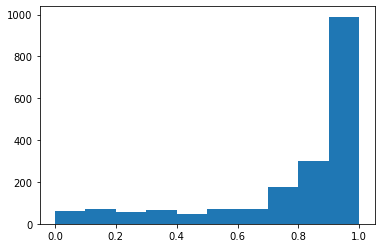

In [35]:
plt.hist(y_data_scaled)

In [90]:
noise = np.random.normal(0.1, 0.05, len(y_train))
y_train_noise = y_train + noise

In [84]:
np.amin(y_train_noise)

0.01289752862255994

In [91]:
#y_train_copy = y_train
y_train = y_train_noise

In [14]:
# stratified splits

mini = np.amin(y_data_scaled)
maxi = np.amax(y_data_scaled)
bins = np.linspace(start=mini, stop=maxi, num=5)
y_binned = np.digitize(y_data_scaled, bins, right=True)
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=6, stratify=y_binned)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[0]	validation_0-rmse:0.30510	validation_1-rmse:0.30758
[3]	validation_0-rmse:0.18068	validation_1-rmse:0.19695
[6]	validation_0-rmse:0.13756	validation_1-rmse:0.16652
[9]	validation_0-rmse:0.12355	validation_1-rmse:0.15817
[12]	validation_0-rmse:0.11068	validation_1-rmse:0.15102
[15]	validation_0-rmse:0.10532	validation_1-rmse:0.14818
[18]	validation_0-rmse:0.09996	validation_1-rmse:0.14658
[21]	validation_0-rmse:0.09701	validation_1-rmse:0.14457
[24]	validation_0-rmse:0.09230	validation_1-rmse:0.14393
[27]	validation_0-rmse:0.08933	validation_1-rmse:0.14292
[30]	validation_0-rmse:0.08740	validation_1-rmse:0.14124
[33]	validation_0-rmse:0.08483	validation_1-rmse:0.14034
[36]	validation_0-rmse:0.08168	validation_1-rmse:0.13901
[39]	validation_0-rmse:0.08006	validation_1-rmse:0.13909
[42]	validation_0-rmse:0.07748	validation_1-rmse:0.13820
[45]	validation_0-rmse:0.07568	validation_1-rmse:0.13804
[48]	validation_0-rmse:0.07429	validation_1-rmse:0.13774
[51]	validation_0-rmse:0.07308	vali

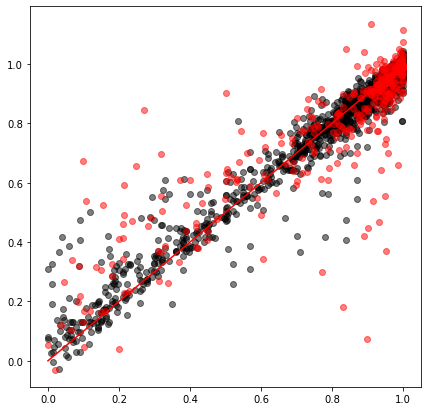

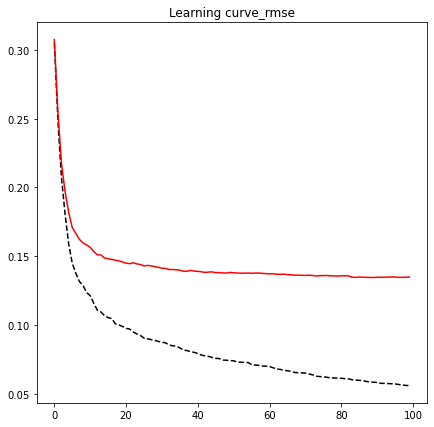

In [15]:
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=3)
# model_CA_1.fit(x_train, y_train)
pred_train = model_CA_1.predict(x_train)
pred_test = model_CA_1.predict(x_test)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))


# # Cross validation
# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_CA_1, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?


plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


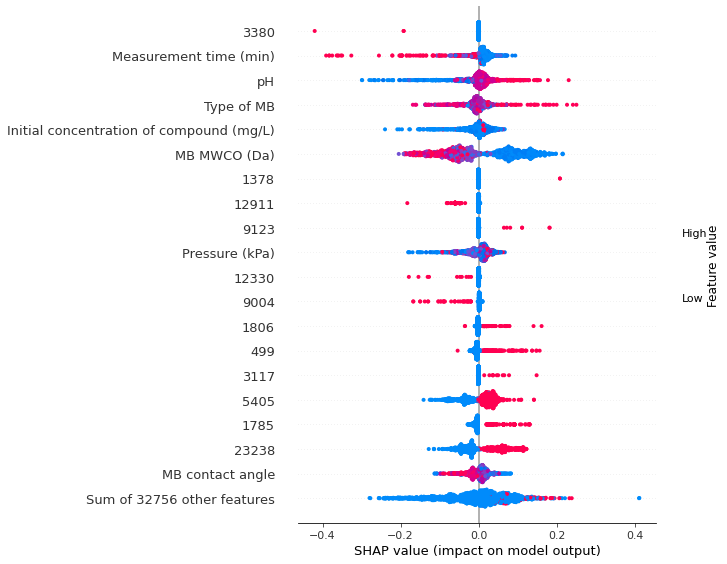

In [16]:
explainer = shap.Explainer(model_CA_1)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0))

(-0.6, 0.6)

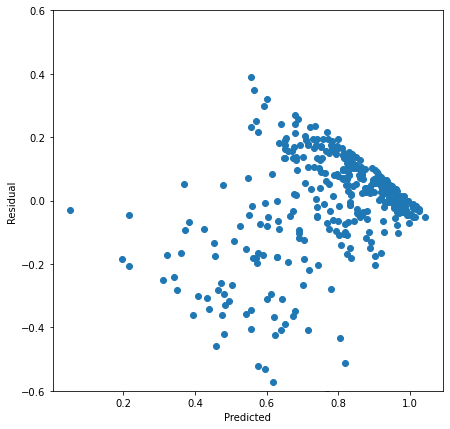

In [281]:
plt.figure(figsize=(7,7))
plt.scatter(pred_test, y_test - pred_test)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.ylim(-0.6,0.6)

In [76]:
x_test.reset_index(drop=True, inplace=True)
x_test

,pH,MB MWCO (Da),MB contact angle,mem_material,1,2,3,4,5,6,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.534884,0.594937,0.601246,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.534884,0.078481,0.775701,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.302326,0.696203,0.902804,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.534884,0.696203,0.902804,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.883721,0.134177,0.747664,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.534884,0.594937,0.235202,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354,0.534884,0.088608,0.523364,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355,0.418605,1.000000,0.387850,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
356,0.883721,0.493671,0.495327,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['y_test']

,0
0,0.472469
1,0.235910
2,0.930117
3,0.759885
4,0.149410
...,...
231,0.820504
232,0.934663
233,0.658672
234,0.874963


In [82]:
pred_CA_1 = pd.DataFrame(pred_CA_1)
pred_CA_1.columns = ['pred_CA_1']

,0
0,0.440796
1,0.690918
2,0.850522
3,0.642909
4,0.247993
...,...
231,0.681323
232,0.842122
233,0.448658
234,0.207753


In [88]:
df_test_temp = pd.concat([y_test, pred_CA_1, x_test], axis=1)

,y_test,pred_CA_1,Type of MB,Types of contaminants,pH,MB MWCO (Da),MB contact angle,MB zeta potential,Pressure (kPa),1,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.472469,0.440796,0.513514,0.527778,0.476744,0.696203,0.902804,0.0,0.190750,0,...,0,0,0,0,1,1,1,0,0,0
1,0.235910,0.690918,0.594595,0.450000,0.534884,0.620253,0.853583,0.0,0.386503,1,...,1,1,1,1,1,0,0,1,1,1
2,0.930117,0.850522,0.027027,0.544444,0.302326,0.088608,0.694704,0.0,0.846626,1,...,0,0,0,0,0,0,1,0,1,1
3,0.759885,0.642909,0.567568,0.283333,0.534884,0.134177,0.339564,0.0,0.079755,1,...,1,0,0,0,1,1,1,1,0,1
4,0.149410,0.247993,0.486486,0.088889,0.767442,0.594937,0.235202,0.0,0.063852,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.820504,0.681323,0.567568,0.933333,0.418605,0.134177,0.605919,0.0,0.110429,1,...,0,0,1,0,1,0,0,0,1,1
232,0.934663,0.842122,0.405405,0.822222,0.534884,0.088608,0.978193,0.0,0.233129,0,...,0,0,0,0,0,0,0,0,0,1
233,0.658672,0.448658,0.270270,0.961111,0.651163,0.468354,0.500000,0.0,0.095706,0,...,0,0,0,0,0,0,0,0,1,0
234,0.874963,0.207753,0.513514,0.933333,0.709302,0.696203,0.902804,0.0,0.064417,1,...,0,0,1,0,1,0,0,0,1,1


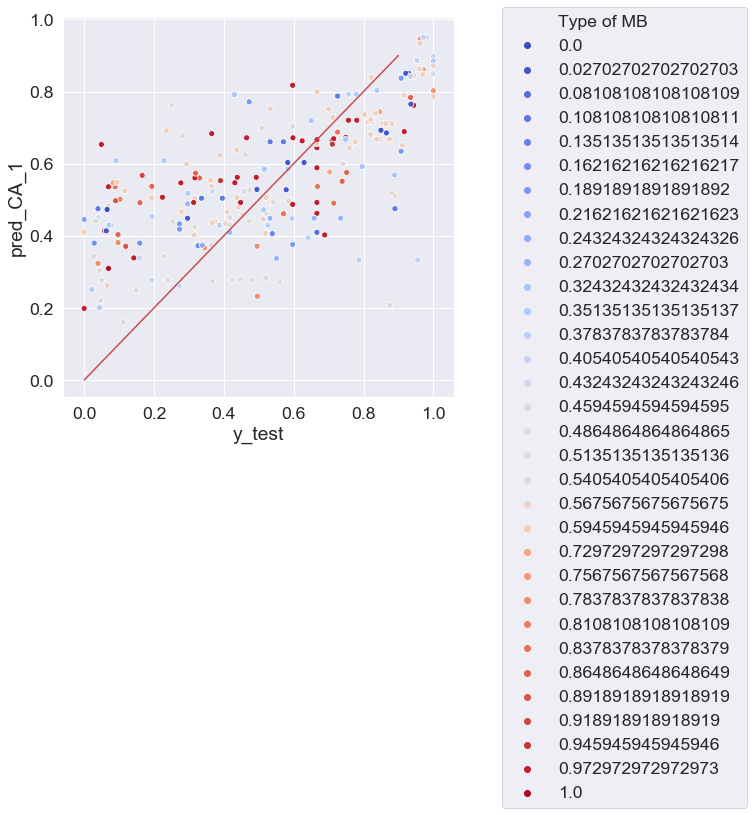

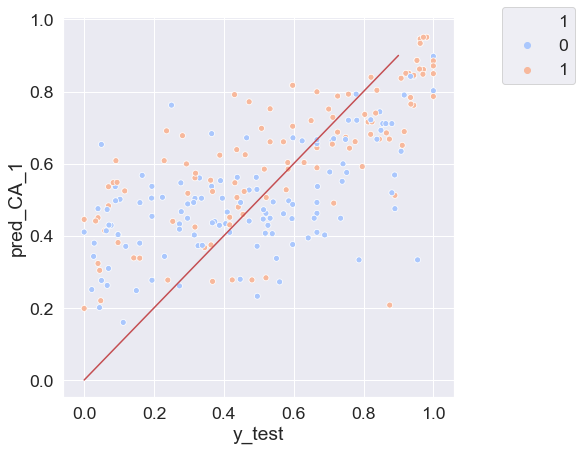

In [99]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['Type of MB'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['1'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [70]:
scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [19. 21. 27. 29. 31.]

In [27]:
scaler.inverse_transform(data_scaled)

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

temp_0 = scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

NameError: name 'scaler' is not defined

In [17]:
# XGBRegressor with Bayesian hyperparameter tuning
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

# # Original
# space={'max_depth': hp.choice('max_depth', np.arange(3, 50, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 20, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 10, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.1, 10, 0.1),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 200, 2000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.3, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 1, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 1, 0.1),
#       }

# # Short 1
# space={'max_depth': hp.choice('max_depth', np.arange(3, 10, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 5, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 1, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.01, 1, 0.01),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 0.5, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.1, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.5, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.5, 0.1),
#       }

# Short 2
space={'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }


kf = KFold(n_splits=6, shuffle=True, random_state=3)

def objective(space, cv=kf, X=x_train, y=y_train):
    clf = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                       reg_alpha = int(space['reg_alpha']), reg_lambda = int(space['reg_lambda']), min_child_weight=space['min_child_weight'],
                       colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'], subsample=space['subsample'],
                       colsample_bylevel=space['colsample_bylevel'], colsample_bynode=space['colsample_bynode'], random_state = 3)
    
    score = -cross_val_score(clf, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return score

trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, rstate=np.random.default_rng(3))
print(best_hyperparams)

100%|████████████████████████████████████████| 100/100 [25:03:53<00:00, 902.33s/trial, best loss: 0.020699561988374558]
{'colsample_bylevel': 0.5, 'colsample_bynode': 0.6000000000000001, 'colsample_bytree': 0.7000000000000001, 'gamma': 0, 'learning_rate': 0.042, 'max_depth': 9, 'min_child_weight': 7, 'n_estimators': 1200.0, 'reg_alpha': 0.8, 'reg_lambda': 1.3, 'subsample': 0.4}


In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_1024_1_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_short.txt', data, fmt='%s')

In [46]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_new.txt', data, fmt='%s')

In [36]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_short.txt', data, fmt='%s')

In [35]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_mem_class.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_2_new.txt', data, fmt='%s')

In [ ]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_4_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_32768_3_fin_b2.txt', data, fmt='%s')

In [47]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048.txt', data, fmt='%s')

In [79]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048_short_2.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6.txt', data, fmt='%s')

In [58]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_short.txt', data, fmt='%s')

In [22]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_new.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_7_short.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_short.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_1_new.txt', data, fmt='%s')

In [65]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_new.txt', data, fmt='%s')

In [68]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_fin.txt', data, fmt='%s')

In [91]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_16384_3_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_short.txt', data, fmt='%s')

In [154]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_fin_b2.txt', data, fmt='%s')

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166.txt', data, fmt='%s')

In [21]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_short.txt', data, fmt='%s')

In [131]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_fin_b2.txt', data, fmt='%s')

In [15]:
best_hyperparams = np.loadtxt("best_hyperparams_pubchem_881_short.txt", dtype=str)
best_hyperparams = dict(best_hyperparams)
for k, v in best_hyperparams.items():
    best_hyperparams[k] = float(v)

In [19]:
# XGBRegressor with Bayesian best parameters
model_B_best = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                             gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
                             colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
                             subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
                             colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

evaluation = [(x_train, y_train), (x_test, y_test)]
model_B_best.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", verbose=3)#, early_stopping_rounds=10)
y_pred_train_best = model_B_best.predict(x_train)
y_pred_test_best = model_B_best.predict(x_test)
print(r2_score(y_train, y_pred_train_best))
print(r2_score(y_test, y_pred_test_best))
results = model_B_best.evals_result()


# Cross validation
model_B_best_cv = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                             gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
                             colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
                             subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
                             colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

n_repeats = 6
for i in range(n_repeats):
    cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
    cv_predictions = cross_val_predict(model_B_best_cv, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
    if i == 0:
        old = cv_predictions
    else:
        old = (np.array(old) + np.array(cv_predictions))/2

print("R2 is ", r2_score(y_data_scaled, old))
# how to add plot_importance with a CV model?

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[0]	validation_0-rmse:0.37783	validation_1-rmse:0.38045
[3]	validation_0-rmse:0.34619	validation_1-rmse:0.34908
[6]	validation_0-rmse:0.31969	validation_1-rmse:0.32326
[9]	validation_0-rmse:0.29704	validation_1-rmse:0.30169
[12]	validation_0-rmse:0.27624	validation_1-rmse:0.28127
[15]	validation_0-rmse:0.25740	validation_1-rmse:0.26304
[18]	validation_0-rmse:0.24204	validation_1-rmse:0.24889
[21]	validation_0-rmse:0.22890	validation_1-rmse:0.23606
[24]	validation_0-rmse:0.21790	validation_1-rmse:0.22619
[27]	validation_0-rmse:0.20689	validation_1-rmse:0.21595
[30]	validation_0-rmse:0.19748	validation_1-rmse:0.20806
[33]	validation_0-rmse:0.18977	validation_1-rmse:0.20174
[36]	validation_0-rmse:0.18321	validation_1-rmse:0.19615
[39]	validation_0-rmse:0.17740	validation_1-rmse:0.19138
[42]	validation_0-rmse:0.17261	validation_1-rmse:0.18647
[45]	validation_0-rmse:0.16776	validation_1-rmse:0.18181
[48]	validation_0-rmse:0.16427	validation_1-rmse:0.17893
[51]	validation_0-rmse:0.16000	vali

[426]	validation_0-rmse:0.08553	validation_1-rmse:0.13298
[429]	validation_0-rmse:0.08532	validation_1-rmse:0.13293
[432]	validation_0-rmse:0.08511	validation_1-rmse:0.13271
[435]	validation_0-rmse:0.08494	validation_1-rmse:0.13267
[438]	validation_0-rmse:0.08475	validation_1-rmse:0.13300
[441]	validation_0-rmse:0.08460	validation_1-rmse:0.13287
[444]	validation_0-rmse:0.08444	validation_1-rmse:0.13283
[447]	validation_0-rmse:0.08418	validation_1-rmse:0.13299
[450]	validation_0-rmse:0.08404	validation_1-rmse:0.13295
[453]	validation_0-rmse:0.08393	validation_1-rmse:0.13272
[456]	validation_0-rmse:0.08379	validation_1-rmse:0.13269
[459]	validation_0-rmse:0.08371	validation_1-rmse:0.13259
[462]	validation_0-rmse:0.08363	validation_1-rmse:0.13246
[465]	validation_0-rmse:0.08354	validation_1-rmse:0.13228
[468]	validation_0-rmse:0.08338	validation_1-rmse:0.13242
[471]	validation_0-rmse:0.08327	validation_1-rmse:0.13252
[474]	validation_0-rmse:0.08310	validation_1-rmse:0.13238
[477]	validati

[852]	validation_0-rmse:0.07094	validation_1-rmse:0.13108
[855]	validation_0-rmse:0.07085	validation_1-rmse:0.13106
[858]	validation_0-rmse:0.07080	validation_1-rmse:0.13083
[861]	validation_0-rmse:0.07074	validation_1-rmse:0.13104
[864]	validation_0-rmse:0.07068	validation_1-rmse:0.13108
[867]	validation_0-rmse:0.07065	validation_1-rmse:0.13119
[870]	validation_0-rmse:0.07057	validation_1-rmse:0.13113
[873]	validation_0-rmse:0.07049	validation_1-rmse:0.13119
[876]	validation_0-rmse:0.07039	validation_1-rmse:0.13143
[879]	validation_0-rmse:0.07032	validation_1-rmse:0.13120
[882]	validation_0-rmse:0.07026	validation_1-rmse:0.13106
[885]	validation_0-rmse:0.07019	validation_1-rmse:0.13101
[888]	validation_0-rmse:0.07014	validation_1-rmse:0.13110
[891]	validation_0-rmse:0.06999	validation_1-rmse:0.13112
[894]	validation_0-rmse:0.06991	validation_1-rmse:0.13094
[897]	validation_0-rmse:0.06983	validation_1-rmse:0.13098
[900]	validation_0-rmse:0.06980	validation_1-rmse:0.13131
[903]	validati

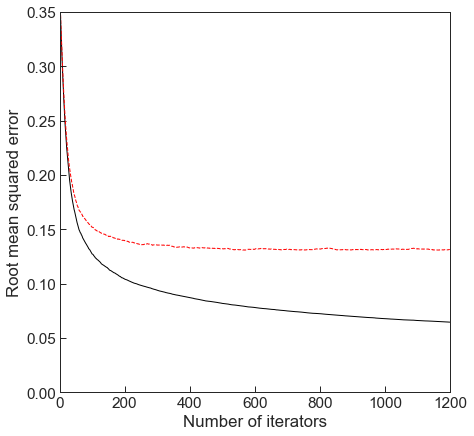

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


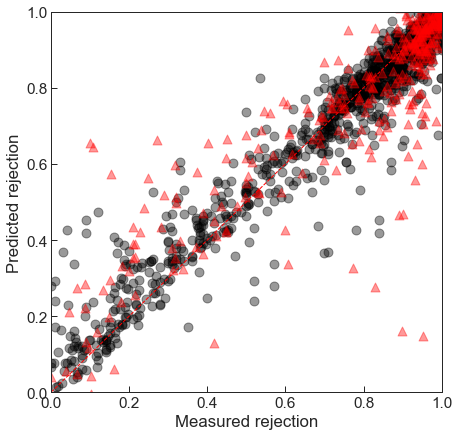

meta NOT subset; don't know how to subset; dropped


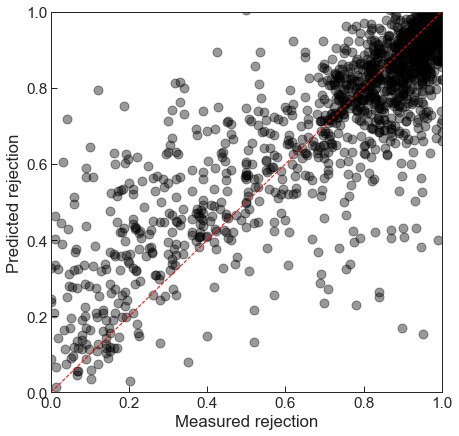

meta NOT subset; don't know how to subset; dropped


In [23]:
fig = plt.figure(figsize=(7,7))
#plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k-') #train
plt.plot(results['validation_1']['rmse'], 'r--') #test
plt.xlabel('Number of iterators')
plt.ylabel('Root mean squared error')
plt.xlim(0, 1200)
plt.ylim(0, 0.35)
plt.xticks(np.arange(0,1201,200))
plt.show()
fig.savefig("fig_0_path_3_fin_b2.pdf", bbox_i6nches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))
plt.scatter(y_train, y_pred_train_best, c='k', alpha=0.4, s=80, edgecolors=None)
plt.scatter(y_test, y_pred_test_best, c='r', marker='^', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r--')
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_1_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))        
plt.scatter(y_data_scaled, old, c='k', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r--')
#plt.plot([y_data_scaled.min(), y_data_scaled.max()], [y_data_scaled.min(), y_data_scaled.max()], 'k--', lw=2)
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_2_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

# fig = plt.figure(figsize=(7,7))
# plt.scatter(y_pred_test_best, y_test - y_pred_test_best)
# plt.show()

In [ ]:
# save the model
filename = 'Model_RDkit_2048.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [81]:
# save the model
filename = 'Model_RDkit_2048_short_2.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_Morgan_2048_6.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [60]:
# save the model
filename = 'Model_Morgan_2048_6_morgan.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [49]:
# save the model
filename = 'Model_MACCS.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [52]:
# save the model
filename = 'Model_MACCS_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
meta NOT subset; don't know how to subset; dropped


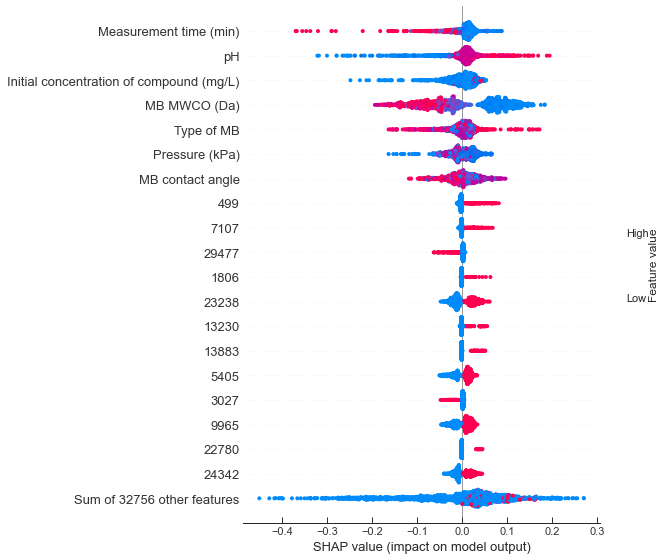

In [24]:
explainer = shap.Explainer(model_B_best)
shap_values = explainer(x_train, check_additivity=False)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0), show=False)#, color=plt.get_cmap("cool"))
#shap.summary_plot(shap_values, x_train)
plt.savefig("shap_path_3_fin_b2.pdf", format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig("shap_morgan.png", format='png', dpi=1000, bbox_inches='tight')

In [49]:
shap.initjs()

In [76]:
shap_values_2 = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values_2[0:5,:], x_train.iloc[0:5,:])

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.041591, while the model output was 0.320452. If this difference is acceptable you can set check_additivity=False to disable this check.

meta NOT subset; don't know how to subset; dropped


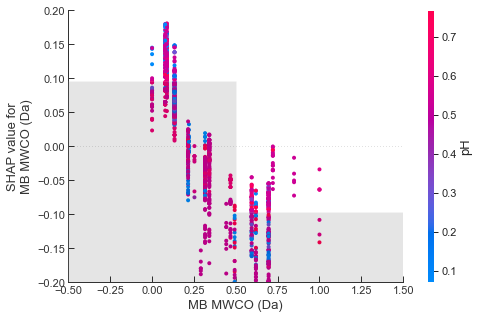

In [21]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html
shap.plots.scatter(shap_values[:,"MB MWCO (Da)"], color=shap_values[:,"pH"], xmin=0, xmax=1.25, ymin=-0.2, ymax=0.2, show=False) #cmap=plt.get_cmap("cool")
plt.savefig("shap_dependence_morgan_2_short.pdf", format='pdf', dpi=1000, bbox_inches='tight')

In [180]:
np.sum(shap_values.abs.max(0).values[3:23])/20

0.0038596674799919128

In [15]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# load the model
loaded_model = pickle.load(open('Model_RDkit_2048_short_2.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.6953144634628119
